<a href="https://colab.research.google.com/github/yun890503/Prediction-of-quality-of-Wine/blob/main/%E3%80%8CDay10%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C%EF%BC%9A%E7%B4%85%E9%85%92%E5%93%81%E8%B3%AA%E9%A0%90%E6%B8%AC%E3%80%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 專題實作：線上讀書會 - 以「紅酒品質分類」為案例 ...

## 預先準備

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from google.colab import files

## 載入資料

In [ ]:
drive.mount('/content/drive')

In [ ]:
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
wine = pd.read_csv('/content/drive/MyDrive/資料科學營/資料科學交戰營第二階段/winequality-red.csv')

In [ ]:
# 看前幾筆

# 檢查欄位數量、欄位名稱、資料格式、資料型態
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 看後幾筆
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# 看全部
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5


In [ ]:
# 展開dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 統計觀察

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
for column in wine.columns:
  print(column)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
quality


### Excersise: 請找出其他欄位的定義。
Link: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

fixed acidity: 非揮發性酸含量

volatile acidity: 揮發性酸含量

citric acid: 檸檬酸

residual sugar: 糖含量

chlorides: 氯化物

free sulfur dioxide: 游離二氧化硫

total sulfur dioxide: 總二氧化硫

density: 密度

pH: 氫離子濃度

sulphates: 硫酸鹽

alcohol: 酒精濃度

quality

### Excersise: 檢視每個數值型欄位值的範圍是否相同。

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


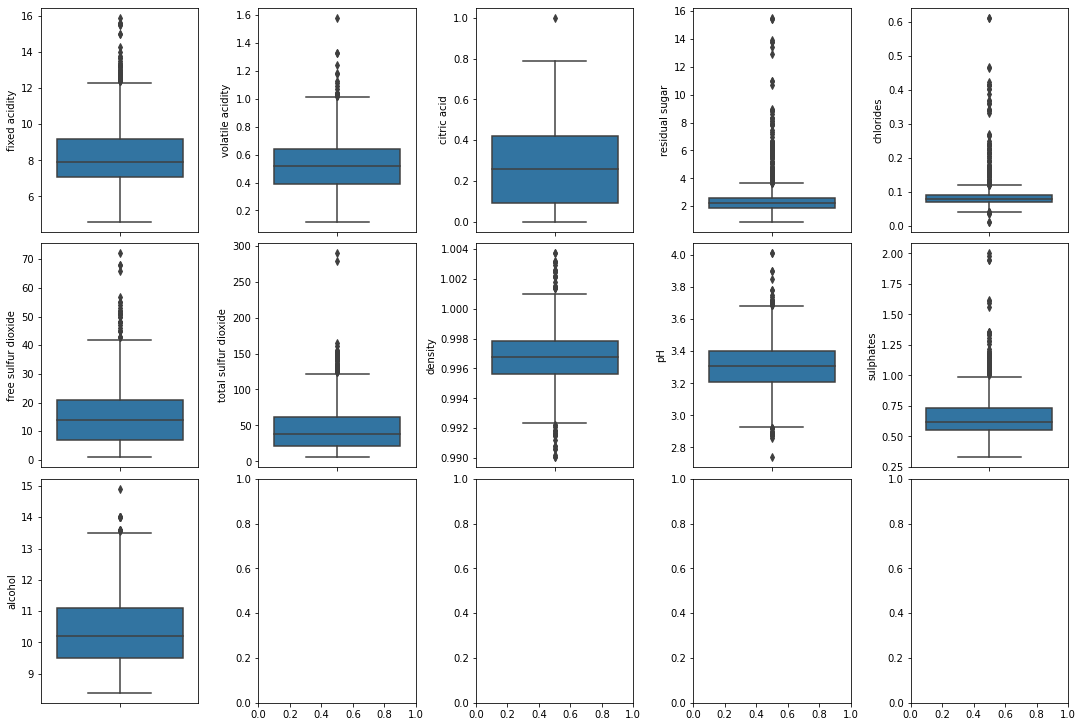

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15, 10))
ax = ax.flatten()
index = 0
for i in wine.columns:
  if i != 'quality':
    sns.boxplot(y=i, data=wine, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

### Excersise: 進一步觀察其他「數值欄位」的屬性與「quality」之關係程度：

<function matplotlib.pyplot.show>

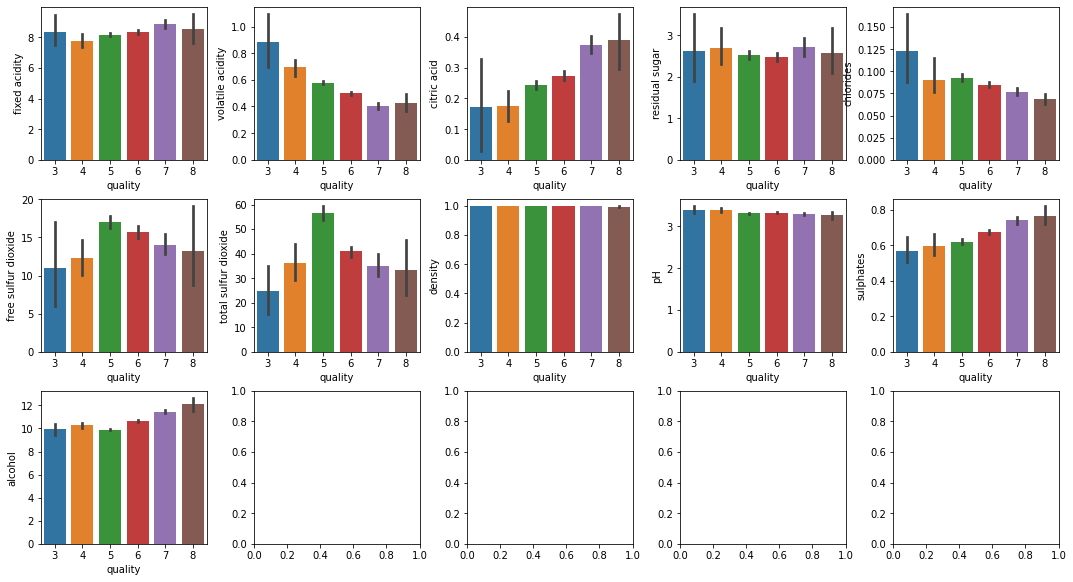

In [ ]:
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(15, 8))
ax = ax.flatten()
index=0
for i in wine.columns:
  if i != 'quality':
    sns.barplot(x='quality', y=i, data=wine, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.4)
plt.show

# fixed acidity 對於quality沒有區別性
# density 對於quality沒有區別性
# PH 對於quality沒有區別性
# 質量越高的红酒，酒精揮發程度越低。
# 質量越高的紅酒，檸檬酸含量越高

### 觀察特徵之間的關係程度

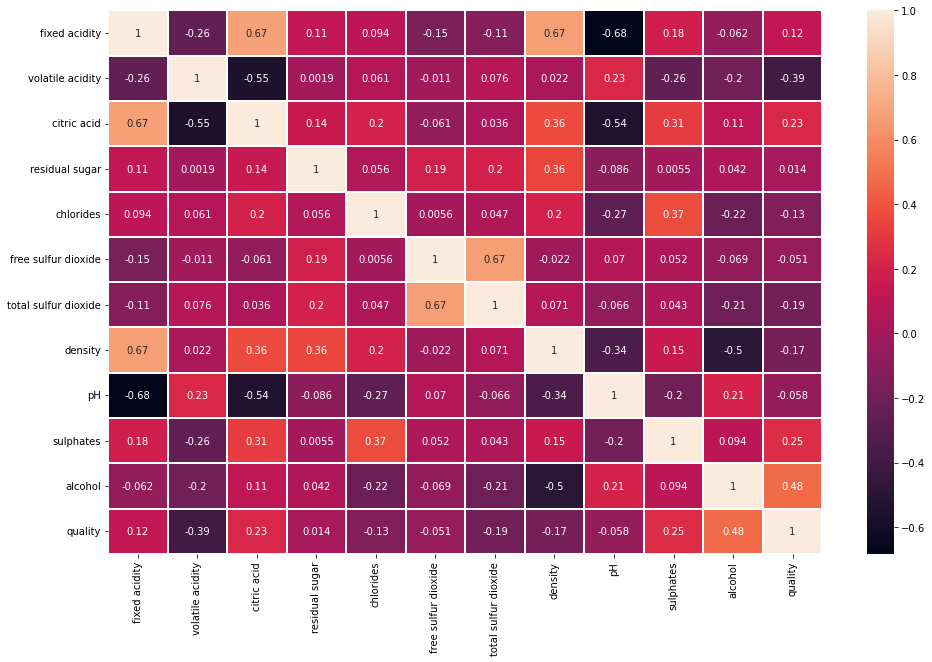

In [ ]:
# 比較每個特徵間的關聯程度
fig, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(wine.corr(), annot = True, linewidth = 1)
plt.show()

# 找出高度正相關的特徵們

### 觀察資料類別不平衡程度

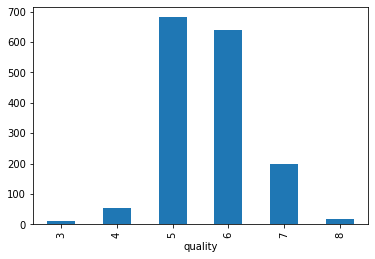

In [ ]:
groups = wine.groupby(by="quality").size()
groups.plot.bar()

## 資料清理



*   缺失值
*   內容清理
*   型態錯誤



### 缺失值

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

### 內容清理

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## 特徵工程

### 抽取新特徵

In [ ]:
# 依據Santa Rosa article(http://srjcstaff.santarosa.edu/~jhenderson/SO2.pdf)，quality越高，游離二氧化硫濃度越高
wine["mso2"] = wine['free sulfur dioxide']/(1+10**wine["pH"] - 1.81)

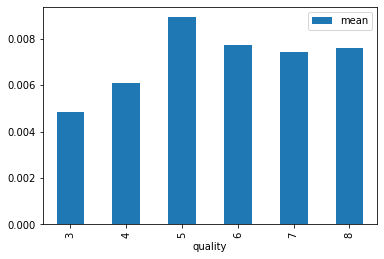

In [ ]:
wine.groupby("quality")["mso2"].aggregate(['mean']).plot.bar()

In [ ]:
# 刪除相關性高的冗余特徵...

### Excersise: 請試試看有哪些特徵工程的操作，能夠幫助你得到更好的結果？

In [ ]:
# normalization，資料正規化
scaler = StandardScaler()
feature_columns = wine.columns.difference(["quality"])
wine[feature_columns] = scaler.fit_transform(wine[feature_columns])

### 資料型態轉換

In [ ]:
# 將quality二分為"good" and "bad"
bins = (0, 6.5, 10)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [ ]:
label_quality = LabelEncoder()
#Bad becomes 0 and good becomes 1
wine['quality'] = label_quality.fit_transform(wine['quality'])

### Excersise: 檢查資料分為“good”和”bad”後，是否有資料不平衡問題？

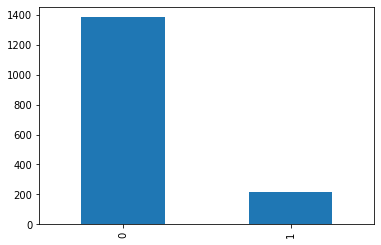

In [ ]:
wine['quality'].value_counts().plot.bar()

In [ ]:
# data imbalance

# upsampling, downsampling, ...

### 訓練集與測試集

In [ ]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 43, stratify=y_train)

In [ ]:
display(X_train.shape)
display(X_test.shape)
display(X_val.shape)

(1151, 12)

(320, 12)

(128, 12)

In [ ]:
y_val.value_counts()

0    221
1     35
Name: quality, dtype: int64

In [ ]:
y_train.value_counts()

0    994
1    157
Name: quality, dtype: int64

### 訓練模型

In [ ]:
rfc = RandomForestClassifier(n_estimators=20, random_state=42)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
display(rfc_eval)

rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

array([0.91341991, 0.9       , 0.88695652, 0.89565217, 0.93043478])

In [ ]:
#model performance
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       277
           1       0.85      0.40      0.54        43

    accuracy                           0.91       320
   macro avg       0.88      0.69      0.74       320
weighted avg       0.90      0.91      0.89       320



In [ ]:
clf = LogisticRegression().fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       277
           1       0.48      0.26      0.33        43

    accuracy                           0.86       320
   macro avg       0.69      0.61      0.63       320
weighted avg       0.84      0.86      0.84       320



# 模型優化

## 超參數優化

In [ ]:
rfc = RandomForestClassifier(random_state=42)
Parameters = {
  'max_depth' : [5, 10, 20],
  'n_estimators': [10, 50, 100, 150],
}

cv = RandomizedSearchCV(rfc, Parameters, cv=5)
cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [5, 10, 20],
                                        'n_estimators': [10, 50, 100, 150]})

In [ ]:
pred_clf = cv.best_estimator_.predict(X_test)
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       277
           1       0.72      0.49      0.58        43

    accuracy                           0.91       320
   macro avg       0.82      0.73      0.77       320
weighted avg       0.90      0.91      0.90       320



In [ ]:
cv.best_params_

{'max_depth': 10, 'n_estimators': 150}

# NN Model

## PyTorch

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1J-toC6cYisOECHs7AFyRArA3KEbIRTwR"  width="60%" height="100%" align="center" />
</p>
<p align="center">

In [ ]:
import torch


# 創建模型架構
class Model(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, 64)
        self.hidden2 = torch.nn.Linear(64, 32)
        self.predict = torch.nn.Linear(32, output_size)

    def forward(self, x):
        output1 = torch.relu(self.hidden1(x))
        output2 = torch.relu(self.hidden2(output1))
        output = torch.sigmoid(self.predict(output2))
        return output

# 模型、優化器初始化
model = Model(X_test.shape[1], 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.0) # 模型參數優化器
loss_func = torch.nn.BCELoss()


# 資料格式轉成torch專用格式
x_data = torch.tensor(X_train.values, dtype=torch.float32)
y_data = torch.tensor(np.expand_dims(y_train, axis=1), dtype=torch.float32)

x_val_data = torch.tensor(X_val.values, dtype=torch.float32)
y_val_data = torch.tensor(np.expand_dims(y_val, axis=1), dtype=torch.float32)

x_test_data = torch.tensor(X_test.values, dtype=torch.float32)
y_test_data = torch.tensor(np.expand_dims(y_test, axis=1), dtype=torch.float32)


batch_size = 32
num_epochs = 200

training_losses = []
val_losses = []

for epoch in range(num_epochs):
    for i in range(0, len(x_data), batch_size):
        prediction = model(x_data[i:i+batch_size])
        loss = loss_func(prediction, y_data[i:i+batch_size])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss = loss_func(model(x_data), y_data)
    training_losses.append(float(loss))

    y_pred = model(x_val_data)
    val_loss = loss_func(y_pred, y_val_data)
    print("training loss:{}, val loss:{}, val acc:{}".format(float(loss), val_loss, accuracy_score(y_val_data, np.where(y_pred >= 0.5, 1, 0))))

    val_losses.append(float(val_loss))

training loss:0.43336328864097595, val loss:0.4240669012069702, val acc:0.8671875
training loss:0.381878525018692, val loss:0.37429898977279663, val acc:0.8671875
training loss:0.3542759120464325, val loss:0.3512195348739624, val acc:0.8671875
training loss:0.3332061767578125, val loss:0.33480948209762573, val acc:0.8671875
training loss:0.3168458044528961, val loss:0.3221380114555359, val acc:0.8671875
training loss:0.304345041513443, val loss:0.3121894896030426, val acc:0.8671875
training loss:0.2945084273815155, val loss:0.3039819002151489, val acc:0.8671875
training loss:0.28655242919921875, val loss:0.2970810830593109, val acc:0.8671875
training loss:0.28016647696495056, val loss:0.29128554463386536, val acc:0.8671875
training loss:0.2750380039215088, val loss:0.2861720621585846, val acc:0.8828125
training loss:0.2708604633808136, val loss:0.281873494386673, val acc:0.8828125
training loss:0.26739826798439026, val loss:0.2780609130859375, val acc:0.8828125
training loss:0.26452201

In [ ]:
y_pred = model(x_test_data)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       277
           1       0.66      0.49      0.56        43

    accuracy                           0.90       320
   macro avg       0.79      0.72      0.75       320
weighted avg       0.89      0.90      0.89       320



Text(0, 0.5, 'loss')

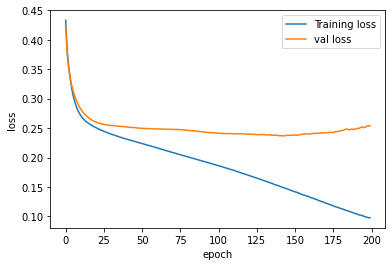

In [ ]:
plt.plot(training_losses)
plt.plot(val_losses)
plt.legend(("Training loss", "val loss"))
plt.xlabel("epoch")
plt.ylabel("loss")

## Keras

In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.3 MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
    layers.Dense(64, name="hidden1", activation="relu"),
    layers.Dense(32, name="hidden2", activation="relu"),
    layers.Dense(1, name="output", activation=tf.nn.sigmoid),
])
optimizer = keras.optimizers.SGD(lr=0.05)
model.compile(optimizer=optimizer, loss=tfa.losses.SigmoidFocalCrossEntropy(), metrics=["Accuracy"])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


36/36 [==============================] - 1s 7ms/step - loss: 0.0339 - Accuracy: 0.8619 - val_loss: 0.0257 - val_Accuracy: 0.8906
Epoch 2/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0279 - Accuracy: 0.8714 - val_loss: 0.0248 - val_Accuracy: 0.8906
Epoch 3/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0268 - Accuracy: 0.8758 - val_loss: 0.0251 - val_Accuracy: 0.8750
Epoch 4/200
36/36 [==============================] - 0s 2ms/step - loss: 0.0249 - Accuracy: 0.8827 - val_loss: 0.0263 - val_Accuracy: 0.8750
Epoch 5/200
36/36 [==============================] - 0s 4ms/step - loss: 0.0257 - Accuracy: 0.8784 - val_loss: 0.0258 - val_Accuracy: 0.8750
Epoch 6/200
36/36 [==============================] - 0s 4ms/step - loss: 0.0246 - Accuracy: 0.8766 - val_loss: 0.0241 - val_Accuracy: 0.8750
Epoch 7/200
36/36 [==============================] - 0s 3ms/step - loss: 0.0236 - Accuracy: 0.8844 - val_loss: 0.0266 - val_Accuracy: 0.9141
Epoch 8/200
36/36 [======

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       277
           1       0.74      0.53      0.62        43

    accuracy                           0.91       320
   macro avg       0.84      0.75      0.79       320
weighted avg       0.91      0.91      0.91       320



In [ ]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
    